In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [28]:
df=pd.read_csv("sui.csv")
pd.set_option('display.max_rows', 10)


In [29]:
df.columns = [col.capitalize() for col in df.columns]

In [30]:
paises_selecc = ['Germany', 'Belgium', 'Croatia', 'Denmark', 'Spain', 'France', 'Ireland', 'Latvia', 'Luxembourg', 'Netherlands', 'Sweden', 'Bulgaria', 'Slovakia', 'Estonia', 'Greece', 'Malta', 'Poland', 'Czech Republic', 'Austria', 'Cyprus', 'Slovenia', 'Finland', 'Hungary', 'Italy', 'Lithuania', 'Portugal', 'Romania', 'Norway', 'Switzerland']

# Filtrar y eliminar las filas que no contengan las palabras permitidas
df_filtrado = df[df['Country'].isin(paises_selecc)]

In [31]:
df_country_year_sortedby=df_filtrado.groupby(["Country"])["Suicides_no"].sum()

In [32]:
#esta lista solo sirve para ver los 5 que más y los 5 que menos que es lo que utilizamos para hacer el primer plot
df_country_year_sortedby=df_country_year_sortedby.sort_values(ascending=False)
df_country_year_sortedby

Country
France        329127
Germany       291262
Poland        139098
Italy         132060
Spain         100202
               ...  
Slovenia       10615
Estonia         7034
Luxembourg      1958
Malta            585
Cyprus           412
Name: Suicides_no, Length: 29, dtype: int64

In [33]:
#esto es para crear la plot por años. Misma informacion pero añadiendo groupby por años
import matplotlib.pyplot as plt
df1=df_filtrado.groupby(["Country","Year"])["Suicides_no"].sum().sort_values(ascending=False)
df1

Country   Year
Germany   1991    14010
          1990    13924
          1992    13458
          1995    12888
          1994    12718
                  ...  
Malta     1986        1
          1987        1
Cyprus    1999        1
Slovakia  2007        0
          2006        0
Name: Suicides_no, Length: 774, dtype: int64

In [34]:
#esto servirá ara hacer la primera tabla ya que filtraremos los que más y los que menos y cogeremos los numeros por año de aquí de los seleccionados
dataframes_by_country = {}
for group, data in df1.groupby(level='Country'):
    dataframes_by_country[group] = pd.DataFrame(data).reset_index().sort_values(by="Year")
    

In [35]:
dataframes_by_country

{'Austria':     Country  Year  Suicides_no
 1   Austria  1985         2091
 0   Austria  1986         2139
 2   Austria  1987         2069
 4   Austria  1988         1851
 3   Austria  1989         1898
 ..      ...   ...          ...
 27  Austria  2012         1276
 23  Austria  2013         1291
 21  Austria  2014         1314
 30  Austria  2015         1251
 31  Austria  2016         1201
 
 [32 rows x 3 columns],
 'Belgium':     Country  Year  Suicides_no
 0   Belgium  1985         2281
 2   Belgium  1986         2202
 1   Belgium  1987         2238
 19  Belgium  1988         1996
 22  Belgium  1989         1920
 ..      ...   ...          ...
 10  Belgium  2011         2088
 13  Belgium  2012         2026
 24  Belgium  2013         1895
 23  Belgium  2014         1899
 27  Belgium  2015         1867
 
 [31 rows x 3 columns],
 'Bulgaria':      Country  Year  Suicides_no
 8   Bulgaria  1985         1456
 11  Bulgaria  1986         1408
 3   Bulgaria  1987         1492
 9   Bulgaria 

In [36]:
#aquí estamos aplicando los selecccionados y creando un diccionario con ellos
selected_countries = ["France","Germany","Spain","Italy","Poland","Cyprus","Malta","Luxembourg","Estonia","Slovenia"]

nuevo_dataframes_by_country = {}

for country in dataframes_by_country.keys():
    if country in selected_countries:
        nuevo_dataframes_by_country[country] = dataframes_by_country[country]
    

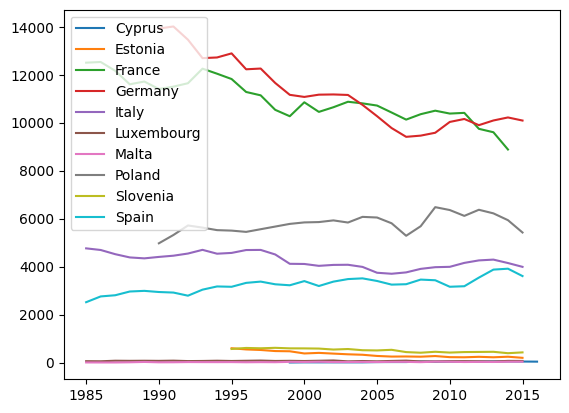

In [37]:
for country in nuevo_dataframes_by_country.keys():
    plt.plot(dataframes_by_country[country]["Year"], dataframes_by_country[country]["Suicides_no"],label=country)
plt.legend()

In [38]:
#esto es la tabla filtrada pero esta vez para sacar los que mas en ratio y los que menos.
df_country_year_sortedbypop=df_filtrado.groupby(["Country"])["Suicides/100k_pop"].sum()
df_country_year_sortedbypop=df_country_year_sortedbypop.sort_values()

In [39]:
df_country_year_sortedbypop

Country
Cyprus         586.26
Greece        1512.12
Malta         1872.01
Italy         3168.87
Slovakia      3318.16
               ...   
Belgium       7900.50
Finland       7924.11
Austria       9076.23
Hungary      10156.07
Lithuania    10588.88
Name: Suicides/100k_pop, Length: 29, dtype: float64

esta es la tabla que tiene los valores por ratio en vez de por numeros totales. Los paises cambian.

In [40]:
dataframes_by_country_ratio = {}
for group, data in df_country_year_sortedbypop.groupby(level='Country'):
    dataframes_by_country_ratio[group] = pd.DataFrame(data).reset_index().sort_values(by="Suicides/100k_pop")
    

selected_countries_ratio = ["Lithuania","Hungary","Austria","Finland","Belgium"]

nuevo_dataframes_para_ratio = {}

for country in dataframes_by_country_ratio.keys():
    if country in selected_countries_ratio:
        nuevo_dataframes_para_ratio[country] = dataframes_by_country_ratio[country]
        
nuevo_dataframes_para_ratio

{'Austria':    Country  Suicides/100k_pop
 0  Austria            9076.23,
 'Belgium':    Country  Suicides/100k_pop
 0  Belgium             7900.5,
 'Finland':    Country  Suicides/100k_pop
 0  Finland            7924.11,
 'Hungary':    Country  Suicides/100k_pop
 0  Hungary           10156.07,
 'Lithuania':      Country  Suicides/100k_pop
 0  Lithuania           10588.88}

In [41]:
dataframes_by_country = {}
for group, data in df1.groupby(level='Country'):
    dataframes_by_country[group] = pd.DataFrame(data).reset_index().sort_values(by="Year")


In [42]:
dataframes_by_country

{'Austria':     Country  Year  Suicides_no
 1   Austria  1985         2091
 0   Austria  1986         2139
 2   Austria  1987         2069
 4   Austria  1988         1851
 3   Austria  1989         1898
 ..      ...   ...          ...
 27  Austria  2012         1276
 23  Austria  2013         1291
 21  Austria  2014         1314
 30  Austria  2015         1251
 31  Austria  2016         1201
 
 [32 rows x 3 columns],
 'Belgium':     Country  Year  Suicides_no
 0   Belgium  1985         2281
 2   Belgium  1986         2202
 1   Belgium  1987         2238
 19  Belgium  1988         1996
 22  Belgium  1989         1920
 ..      ...   ...          ...
 10  Belgium  2011         2088
 13  Belgium  2012         2026
 24  Belgium  2013         1895
 23  Belgium  2014         1899
 27  Belgium  2015         1867
 
 [31 rows x 3 columns],
 'Bulgaria':      Country  Year  Suicides_no
 8   Bulgaria  1985         1456
 11  Bulgaria  1986         1408
 3   Bulgaria  1987         1492
 9   Bulgaria 

In [43]:
#esta es la tabla que se utiliza para ver los paises con mas y con menos ratio de suicidios
df_basta=df_filtrado.groupby(["Country","Year"])["Suicides/100k_pop"].sum().sort_values(ascending=False)
df_basta

Country    Year
Lithuania  1995    639.30
           1996    595.61
Hungary    1991    575.00
Lithuania  2000    571.80
Hungary    1992    570.26
                    ...  
Cyprus     2000      8.36
Malta      1986      3.61
Cyprus     1999      1.57
Slovakia   2006      0.00
           2007      0.00
Name: Suicides/100k_pop, Length: 774, dtype: float64

In [44]:
dataframes_by_country2 = {}
for group, data in df_basta.groupby(level='Country'):
    dataframes_by_country2[group] = pd.DataFrame(data).reset_index().sort_values(by="Year")

In [45]:
dataframes_by_country2


{'Austria':     Country  Year  Suicides/100k_pop
 2   Austria  1985             384.81
 1   Austria  1986             401.80
 0   Austria  1987             405.88
 4   Austria  1988             357.64
 3   Austria  1989             359.32
 ..      ...   ...                ...
 29  Austria  2012             206.63
 25  Austria  2013             212.12
 27  Austria  2014             209.82
 30  Austria  2015             194.62
 31  Austria  2016             183.23
 
 [32 rows x 3 columns],
 'Belgium':     Country  Year  Suicides/100k_pop
 0   Belgium  1985             332.04
 2   Belgium  1986             314.69
 1   Belgium  1987             327.76
 8   Belgium  1988             283.80
 6   Belgium  1989             284.85
 ..      ...   ...                ...
 21  Belgium  2011             226.71
 25  Belgium  2012             217.13
 29  Belgium  2013             201.55
 28  Belgium  2014             201.85
 30  Belgium  2015             196.66
 
 [31 rows x 3 columns],
 'Bulgaria':  

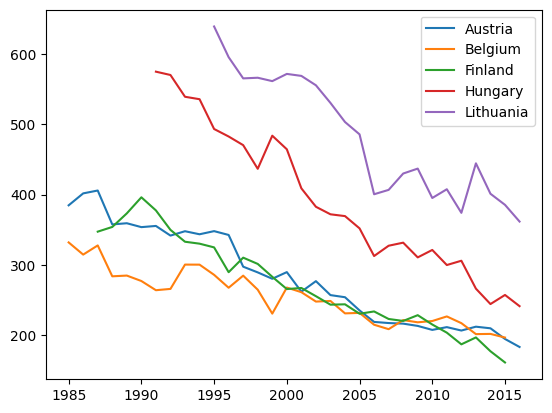

In [46]:
for country in nuevo_dataframes_para_ratio.keys():
    plt.plot(dataframes_by_country2[country]["Year"], dataframes_by_country2[country]["Suicides/100k_pop"],label=country)
plt.legend()

In [47]:

edades=df_filtrado.groupby(["Country","Age"])["Suicides/100k_pop"].sum()

In [48]:
edades = edades.to_frame()

edades


Suicides/100k_pop
Country     Age                           
Austria     15-24 years             807.17
            25-34 years            1027.35
            35-54 years            1458.21
            5-14 years               31.26
            55-74 years            1904.17
...                                    ...
Switzerland 25-34 years             535.88
            35-54 years             781.71
            5-14 years               16.91
            55-74 years            1050.97
            75+ years              1952.76

[174 rows x 1 columns]

In [49]:
selected_countries3 = ["Lithuania","Hungary","Austria","Finland","Belgium"]
dataframes_by_country3 = {}
for group, data in edades.groupby(level='Country'):
    dataframes_by_country3[group] = pd.DataFrame(data).reset_index().sort_values(by="Age")

nuevo_dataframe_by_country4={}
for country in dataframes_by_country3.keys():
    if country in selected_countries3:
        nuevo_dataframe_by_country4[country] = dataframes_by_country3[country]

In [50]:
nuevo_dataframe_by_country4

{'Austria':    Country          Age  Suicides/100k_pop
 0  Austria  15-24 years             807.17
 1  Austria  25-34 years            1027.35
 2  Austria  35-54 years            1458.21
 3  Austria   5-14 years              31.26
 4  Austria  55-74 years            1904.17
 5  Austria    75+ years            3848.07,
 'Belgium':    Country          Age  Suicides/100k_pop
 0  Belgium  15-24 years             671.13
 1  Belgium  25-34 years            1168.43
 2  Belgium  35-54 years            1682.52
 3  Belgium   5-14 years              34.98
 4  Belgium  55-74 years            1649.54
 5  Belgium    75+ years            2693.90,
 'Finland':    Country          Age  Suicides/100k_pop
 0  Finland  15-24 years            1154.92
 1  Finland  25-34 years            1573.30
 2  Finland  35-54 years            1858.51
 3  Finland   5-14 years              30.08
 4  Finland  55-74 years            1614.24
 5  Finland    75+ years            1693.06,
 'Hungary':    Country          Age  Sui

In [94]:
#filetres dataframe with all the countries where you can see the sum of the ratios puttng sex and ages all together to have the tptales per country
df3=df_filtrado.groupby(["Country","Sex"])["Suicides/100k_pop"].sum()

In [129]:
paises_seleccionados = df3.loc[["Lithuania","Hungary","Austria","Finland","Belgium"]]


In [97]:
#this is the filtered dataframe that will be our base to create our graphic in Tableau
paises_seleccionados

Country    Sex   
Lithuania  female    1686.52
           male      8902.36
Hungary    female    2186.07
           male      7970.00
Austria    female    1971.65
           male      7104.58
Finland    female    1582.58
           male      6341.53
Belgium    female    1937.60
           male      5962.90
Name: Suicides/100k_pop, dtype: float64

In [ ]:
df4=df_filtrado.groupby(["Country","Gdp_per_capita($)"])["Suicides/100k_pop"].sum()

In [115]:
#correlaction entre gdp per capita,and the ratio. We can conclude that there is a minimum negative correlation. The wealthier you are
#less likely you will commit suicide. However, this correlation is not significant.
corr_mat=df_filtrado["Suicides/100k_pop"].corr(df_filtrado["Gdp_per_capita($)"])
corr_mat

-0.105038260087179

In [117]:
#funcion para crear una columna donde se sustituya male por 1 y female por 0.
def num_gen(cell):
    if cell == "male":
        return 1
    if cell == "female":
        return 0

In [126]:
#correlation between the gender and the ratio of suicides. Not sigfificant because in every country the numbers are very different fro each other. nevertheless, we can
#see a positive correlation.
precorr=df_filtrado["Sex"].apply(num_gen)

df_filtrado['num_gen_column'] = df_filtrado['Sex'].apply(num_gen)
df_filtrado["Suicides/100k_pop"].corr(df_filtrado["num_gen_column"])

C:\Users\loren\AppData\Local\Temp\ipykernel_256564\1519200472.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['num_gen_column'] = df_filtrado['Sex'].apply(num_gen)


0.4542143221229731

,Country,Year,Sex,Age,Suicides_no,Population,Suicides/100k_pop,Country-year,Hdi_for_year,Gdp_for_year($),Gdp_per_capita($),Generation,num_gen_column
1786,Austria,1985,male,75+ years,152,156535,97.10,Austria1985,0.764,"69,386,774,475",9759,G.I. Generation,1
1787,Austria,1985,male,55-74 years,355,584253,60.76,Austria1985,0.764,"69,386,774,475",9759,G.I. Generation,1
1788,Austria,1985,male,35-54 years,515,940526,54.76,Austria1985,0.764,"69,386,774,475",9759,Silent,1
1789,Austria,1985,male,25-34 years,232,548783,42.28,Austria1985,0.764,"69,386,774,475",9759,Boomers,1
1790,Austria,1985,female,75+ years,110,339223,32.43,Austria1985,0.764,"69,386,774,475",9759,G.I. Generation,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24973,Switzerland,2015,female,55-74 years,82,922222,8.89,Switzerland2015,NaN,"679,289,166,858",86068,Boomers,0
24974,Switzerland,2015,female,15-24 years,20,462559,4.32,Switzerland2015,NaN,"679,289,166,858",86068,Millenials,0
24975,Switzerland,2015,female,25-34 years,24,577973,4.15,Switzerland2015,NaN,"679,289,166,858",86068,Millenials,0
24976,Switzerland,2015,female,5-14 years,2,390910,0.51,Switzerland2015,NaN,"679,289,166,858",86068,Generation Z,0


In [132]:
weather=df_filtrado.groupby(["Country"])["Suicides/100k_pop"].sum()
type(weather)

pandas.core.series.Series

In [135]:
df_weather = weather.to_frame()
df_weather=df_weather.loc[["Lithuania","Hungary","Austria","Finland","Belgium","Cyprus","Greece","Malta","Italy","Slovakia"]]

In [138]:
df_weather['sunny'] = ['1588', '1720', '1930', '1780', '1546',"3425","2771","2957","2600","2042"]

In [139]:
df_weather

,Suicides/100k_pop,sunny
Country,,
Lithuania,10588.88,1588
Hungary,10156.07,1720
Austria,9076.23,1930
Finland,7924.11,1780
Belgium,7900.50,1546
Cyprus,586.26,3425
Greece,1512.12,2771
Malta,1872.01,2957
Italy,3168.87,2600
